In [14]:
%run Global.ipynb
%run Helper_Functions.ipynb

In [3]:
train_df_ohe_selected = pd.read_csv("./Final/Datasets/train_df.csv", keep_default_na=False)

y = train_df_ohe_selected.iloc[:,-1]
X = train_df_ohe_selected.iloc[:,:-1]

In [6]:
from sklearn.linear_model import LogisticRegression

# Logistic Regression

In [3]:
from sklearn.linear_model import LogisticRegression

logr = LogisticRegression(solver='sag') # uses Stochastic Average Gradient descent solver

In [18]:
param_grid = {'max_iter': [50,100,150]}
cv_results = tune_hyperparameter(logr, param_grid, X, y, cv=3)
cv_results
# max_iter>=500 works well

Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV] END ........................................max_iter=50; total time=  11.7s
[CV] END ........................................max_iter=50; total time=   8.9s
[CV] END ........................................max_iter=50; total time=   7.4s
[CV] END .......................................max_iter=100; total time=  15.3s
[CV] END .......................................max_iter=100; total time=   9.9s
[CV] END .......................................max_iter=100; total time=   9.9s
[CV] END .......................................max_iter=150; total time=  10.4s
[CV] END .......................................max_iter=150; total time=   9.0s
[CV] END .......................................max_iter=150; total time=  10.4s


,params,mean_test_3.0_precision,std_test_3.0_precision,rank_test_3.0_precision,mean_test_3.0_recall,std_test_3.0_recall,rank_test_3.0_recall,mean_test_3.0_f1-score,std_test_3.0_f1-score,rank_test_3.0_f1-score,...,rank_test_5.0_precision,mean_test_5.0_recall,std_test_5.0_recall,rank_test_5.0_recall,mean_test_5.0_f1-score,std_test_5.0_f1-score,rank_test_5.0_f1-score,mean_test_accuracy,std_test_accuracy,rank_test_accuracy
0,{'max_iter': 50},0.653834,0.018153,1,0.177864,0.002369,1,0.279576,0.001355,1,...,1,0.079706,0.011606,1,0.144166,0.018271,1,0.727355,0.001217,1
1,{'max_iter': 100},0.653834,0.018153,1,0.177864,0.002369,1,0.279576,0.001355,1,...,1,0.079706,0.011606,1,0.144166,0.018271,1,0.727355,0.001217,1
2,{'max_iter': 150},0.653834,0.018153,1,0.177864,0.002369,1,0.279576,0.001355,1,...,1,0.079706,0.011606,1,0.144166,0.018271,1,0.727355,0.001217,1


LogisticRegression prediction took 127.7243549823761 seconds.

   3.0_precision  3.0_recall  3.0_f1-score  4.0_precision  4.0_recall  \
0       0.656863    0.228279      0.338812       0.740935    0.958051   
1       0.682635    0.194208      0.302387       0.737312    0.967921   
2       0.686391    0.197952      0.307285       0.736620    0.967921   
3       0.622642    0.168942      0.265772       0.731673    0.960518   
4       0.728814    0.220137      0.338139       0.742439    0.969155   
5       0.677019    0.186007      0.291834       0.735557    0.966070   
6       0.671233    0.167235      0.267760       0.732618    0.968538   
7       0.642045    0.192833      0.296588       0.736321    0.962986   
8       0.683616    0.206133      0.316754       0.737016    0.963580   
9       0.656977    0.192504      0.297760       0.735751    0.964198   

   4.0_f1-score  5.0_precision  5.0_recall  5.0_f1-score  accuracy  
0      0.835620       0.714286    0.050505      0.094340  0.7334

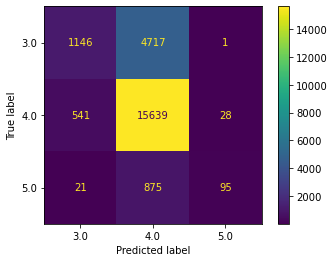

,mean,std
3.0_precision,0.670823,0.028835
3.0_recall,0.195423,0.019472
3.0_f1-score,0.302309,0.024814
4.0_precision,0.736624,0.003259
4.0_recall,0.964894,0.003696
4.0_f1-score,0.835441,0.002553
5.0_precision,0.781429,0.101276
5.0_recall,0.095889,0.024478
5.0_f1-score,0.169424,0.038851
accuracy,0.731908,0.004725


In [19]:
logr = LogisticRegression(solver='sag', max_iter=50, random_state=30027)
logr.fit(X, y)
cross_val_report(logr, X, y)[1]

LogisticRegression prediction took 128.30999898910522 seconds.

   3.0_precision  3.0_recall  3.0_f1-score  4.0_precision  4.0_recall  \
0       0.656863    0.228279      0.338812       0.740935    0.958051   
1       0.682635    0.194208      0.302387       0.737312    0.967921   
2       0.686391    0.197952      0.307285       0.736620    0.967921   
3       0.622642    0.168942      0.265772       0.731673    0.960518   
4       0.728814    0.220137      0.338139       0.742439    0.969155   
5       0.677019    0.186007      0.291834       0.735557    0.966070   
6       0.671233    0.167235      0.267760       0.732618    0.968538   
7       0.642045    0.192833      0.296588       0.736321    0.962986   
8       0.683616    0.206133      0.316754       0.737016    0.963580   
9       0.656977    0.192504      0.297760       0.735751    0.964198   

   4.0_f1-score  5.0_precision  5.0_recall  5.0_f1-score  accuracy  
0      0.835620       0.714286    0.050505      0.094340  0.733

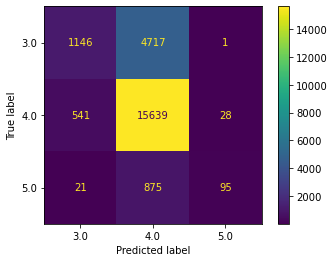

,mean,std
3.0_precision,0.670823,0.028835
3.0_recall,0.195423,0.019472
3.0_f1-score,0.302309,0.024814
4.0_precision,0.736624,0.003259
4.0_recall,0.964894,0.003696
4.0_f1-score,0.835441,0.002553
5.0_precision,0.781429,0.101276
5.0_recall,0.095889,0.024478
5.0_f1-score,0.169424,0.038851
accuracy,0.731908,0.004725


In [7]:
# 300 features
train_df_ohe_selected = pd.read_csv("./Final/Datasets/train_df_300.csv", keep_default_na=False)

y = train_df_ohe_selected.iloc[:,-1]
X = train_df_ohe_selected.iloc[:,:-1]

logr = LogisticRegression(solver='sag', max_iter=50, random_state=30027)
logr.fit(X, y)
cross_val_report(logr, X, y)[1]

## Attempt 2: Using selected features

In [20]:
selector = SelectFromModel(logr, prefit=True).fit(X, y)
print("LogR Coefficients:", selector.estimator_.coef_)
print("Selector threshold:", selector.threshold_)
selected_features = [X.columns[i] for i in range(X.shape[1]) if selector.get_support()[i]]
print(len(selected_features), "features selected")
X_filtered = X[selected_features]

LogR Coefficients: [[ 1.81017756e+00  5.06716768e-03  4.16578365e-02 ...  1.68507896e-01
  -2.33456361e-01  9.48739482e-01]
 [-1.16858592e+00 -3.06978037e-02  3.19729234e-03 ...  1.03174751e-01
   2.34755725e-01  1.31449755e-01]
 [-6.41591640e-01  2.56306360e-02 -4.48551288e-02 ... -2.71682647e-01
  -1.29936314e-03 -1.08018924e+00]]
Selector threshold: 1.359023438646688
524 features selected


LogisticRegression prediction took 51.60170078277588 seconds.

   3.0_precision  3.0_recall  3.0_f1-score  4.0_precision  4.0_recall  \
0       0.743243    0.187394      0.299320       0.736034    0.975324   
1       0.725191    0.161840      0.264624       0.732225    0.978408   
2       0.767606    0.186007      0.299451       0.737819    0.980876   
3       0.752294    0.139932      0.235971       0.728650    0.979025   
4       0.798450    0.175768      0.288112       0.735118    0.982727   
5       0.766667    0.156997      0.260623       0.732505    0.981493   
6       0.729508    0.151877      0.251412       0.730327    0.979025   
7       0.764286    0.182594      0.294766       0.737454    0.979025   
8       0.800000    0.177172      0.290098       0.735675    0.982716   
9       0.721311    0.149915      0.248237       0.729829    0.977160   

   4.0_f1-score  5.0_precision  5.0_recall  5.0_f1-score  accuracy  
0      0.838949       0.727273    0.080808      0.145455  0.7364

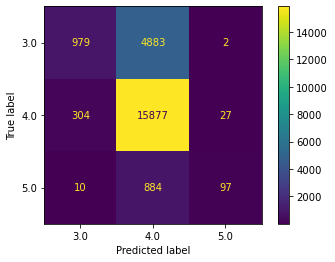

,mean,std
3.0_precision,0.756855,0.028045
3.0_recall,0.166949,0.016933
3.0_f1-score,0.273261,0.023711
4.0_precision,0.733563,0.003295
4.0_recall,0.979578,0.002388
4.0_f1-score,0.838903,0.002518
5.0_precision,0.786726,0.122511
5.0_recall,0.097889,0.015145
5.0_f1-score,0.173379,0.024240
accuracy,0.735073,0.004547


In [22]:
logr.fit(X_filtered, y)
cross_val_report(logr, X_filtered, y)[1]

In [9]:
selector = SelectFromModel(logr, prefit=True).fit(X, y)
print("LogR Coefficients:", selector.estimator_.coef_)
print("Selector threshold:", selector.threshold_)


LogR Coefficients: [[ 1.81017756e+00  5.06716768e-03  4.16578365e-02 ...  1.68507896e-01
  -2.33456361e-01  9.48739482e-01]
 [-1.16858592e+00 -3.06978037e-02  3.19729234e-03 ...  1.03174751e-01
   2.34755725e-01  1.31449755e-01]
 [-6.41591640e-01  2.56306360e-02 -4.48551288e-02 ... -2.71682647e-01
  -1.29936314e-03 -1.08018924e+00]]
Selector threshold: 1.359023438646688


In [28]:
logr = LogisticRegression(solver='sag', max_iter=50, random_state=30027)

thresholds = [i/10 for i in range(0, 22)]
nFeatures = []
accuracy = []
f1_3 = []
f1_4 = []
f1_5 = []
accuracy_std = []
for threshold in thresholds: 
    selector = SelectFromModel(logr, threshold=threshold).fit(X, y)
    selected_features = [X.columns[i] for i in range(X.shape[1]) if selector.get_support()[i]]
    nFeatures.append(len(selected_features))
    print(f'threshold = {threshold}: {len(selected_features)} features selected')
    X_filtered = X[selected_features]
    logr.fit(X_filtered, y)
    df = cross_val_report(logr, X_filtered, y, print_confusion_matrix=False, print_full_results=False, predict=False)[1]
    accuracy.append(df.loc['accuracy']['mean'])
    f1_3.append(df.loc['3.0_f1-score']['mean'])
    f1_4.append(df.loc['4.0_f1-score']['mean'])
    f1_5.append(df.loc['5.0_f1-score']['mean'])
    accuracy_std.append(df.loc['accuracy']['std'])

threshold = 0.0: 1108 features selected
LogisticRegression prediction took 140.09111714363098 seconds.

threshold = 0.1: 1086 features selected
LogisticRegression prediction took 126.15939617156982 seconds.

threshold = 0.2: 1066 features selected
LogisticRegression prediction took 135.6067771911621 seconds.

threshold = 0.3: 1032 features selected
LogisticRegression prediction took 115.65002012252808 seconds.

threshold = 0.4: 993 features selected
LogisticRegression prediction took 128.0643961429596 seconds.

threshold = 0.5: 946 features selected
LogisticRegression prediction took 126.78854513168335 seconds.

threshold = 0.6: 883 features selected
LogisticRegression prediction took 105.39535593986511 seconds.

threshold = 0.7: 829 features selected
LogisticRegression prediction took 108.03469800949097 seconds.

threshold = 0.8: 783 features selected
LogisticRegression prediction took 102.77078199386597 seconds.

threshold = 0.9: 732 features selected
LogisticRegression prediction to

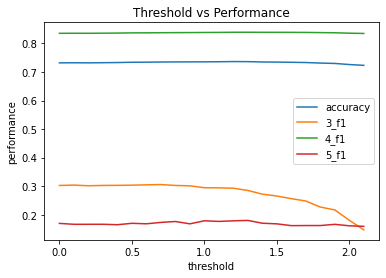

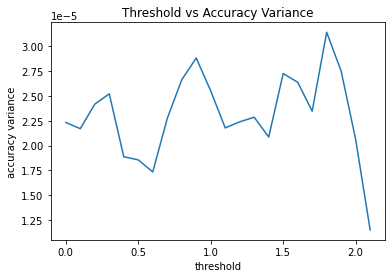

In [36]:
plt.plot(thresholds, accuracy, label = "accuracy")
plt.plot(thresholds, f1_3, label = "3_f1")
plt.plot(thresholds, f1_4, label = "4_f1")
plt.plot(thresholds, f1_5, label = "5_f1")
plt.legend()
plt.xlabel("threshold")
plt.ylabel("performance")
plt.title("Threshold vs Performance")
plt.show()

plt.plot(thresholds, [i**2 for i in accuracy_std], label = "accuracy_std")
plt.xlabel("threshold")
plt.ylabel("accuracy variance")
plt.title("Threshold vs Accuracy Variance")
plt.show()

## Attempt 3: Applying Dimensionality Reduction

In [23]:
from sklearn.decomposition import PCA

reducer = PCA(n_components=100, random_state=30027)
X_reduced = reducer.fit_transform(X_filtered)
X_reduced

array([[-1.58749291e-01, -8.68691473e-03, -2.00571373e-02, ...,
        -1.15882293e-03, -1.72069591e-03, -6.14733227e-04],
       [ 1.71736802e-01, -7.50265880e-03,  4.58859394e-05, ...,
        -1.55186753e-03, -2.37606451e-05,  1.01778364e-03],
       [-1.58749291e-01, -8.68691473e-03, -2.00571373e-02, ...,
        -1.15882293e-03, -1.72069591e-03, -6.14733227e-04],
       ...,
       [-1.59012594e-01, -1.02191593e-02, -2.04760411e-02, ...,
        -1.12360680e-03, -2.69115483e-04, -9.08357220e-04],
       [-1.58749291e-01, -8.68691473e-03, -2.00571373e-02, ...,
        -1.15882293e-03, -1.72069591e-03, -6.14733227e-04],
       [-1.58749291e-01, -8.68691473e-03, -2.00571373e-02, ...,
        -1.15882293e-03, -1.72069591e-03, -6.14733227e-04]])

LogisticRegression prediction took 9.240464210510254 seconds.

   3.0_precision  3.0_recall  3.0_f1-score  4.0_precision  4.0_recall  \
0       0.611940    0.069847      0.125382       0.712561    0.983344   
1       0.462687    0.052811      0.094801       0.709360    0.977175   
2       0.560606    0.063140      0.113497       0.711220    0.981493   
3       0.614035    0.059727      0.108865       0.712628    0.985194   
4       0.666667    0.075085      0.134969       0.715756    0.986428   
5       0.561404    0.054608      0.099533       0.711925    0.983344   
6       0.607143    0.058020      0.105919       0.712249    0.986428   
7       0.630435    0.049488      0.091772       0.710293    0.987662   
8       0.591549    0.071550      0.127660       0.713133    0.982099   
9       0.596154    0.052811      0.097027       0.711042    0.985802   

   4.0_f1-score  5.0_precision  5.0_recall  5.0_f1-score  accuracy  
0      0.826335       0.666667    0.020202      0.039216  0.7095

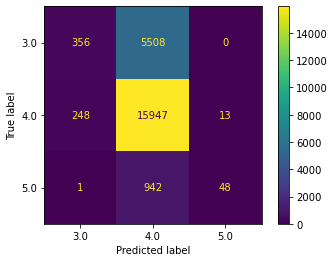

,mean,std
3.0_precision,0.590262,0.054565
3.0_recall,0.060709,0.008880
3.0_f1-score,0.109943,0.015067
4.0_precision,0.712017,0.001751
4.0_recall,0.983897,0.003111
4.0_f1-score,0.826162,0.001910
5.0_precision,0.790714,0.148620
5.0_recall,0.048455,0.018352
5.0_f1-score,0.090741,0.032760
accuracy,0.708971,0.003021


In [24]:
logr.fit(X_reduced, y)
cross_val_report(logr, X_reduced, y)[1]

In [10]:
# Dimensionality reduction doesn't work well - Let's retain the original features

In [25]:
from __future__ import print_function
import time

import numpy as np
import pandas as pd

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import seaborn as sns

In [33]:
# separability of 3 and 5
pca = PCA(n_components=3)
pca_result = pca.fit_transform(X.loc[y != 4].values)
df = train_df_ohe_selected.copy().loc[y!=4].reset_index(drop=True)

df['pca-one'] = pca_result[:,0]
df['pca-two'] = pca_result[:,1] 
df['pca-three'] = pca_result[:,2] 

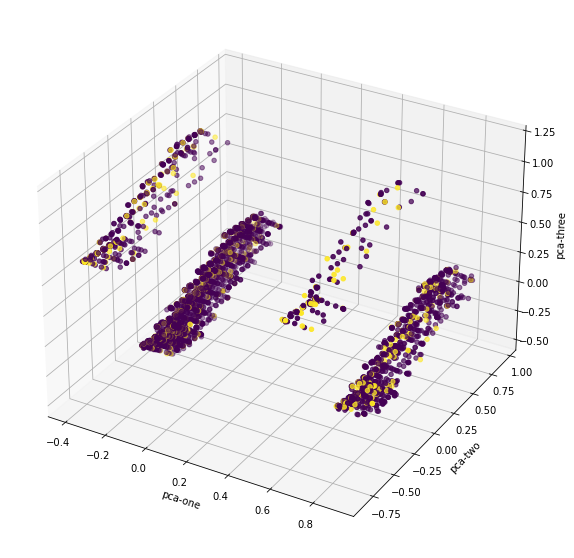

In [38]:
rndperm = np.random.permutation(df.shape[0])
ax = plt.figure(figsize=(16,10)).add_subplot(projection='3d')
ax.scatter(
    xs=df.loc[rndperm,:]["pca-one"], 
    ys=df.loc[rndperm,:]["pca-two"], 
    zs=df.loc[rndperm,:]["pca-three"], 
    c=df.loc[rndperm,:]["rating_label"], 
    cmap='viridis'
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.savefig('PCA.png')
plt.show()

In [ ]:
train_df_ohe_selected_50 = pd.read_csv("./Final/Datasets/train_df.csv", keep_default_na=False)

y = train_df_ohe_selected_50.iloc[:,-1]
X_50 = train_df_ohe_selected_50.iloc[:,:-1]
import numpy as np
from sklearn.metrics.pairwise import check_pairwise_arrays
from scipy.linalg import cholesky
from sklearn.linear_model import LogisticRegression

def anova_kernel(X, Y=None, gamma=None, p=1):
    X, Y = check_pairwise_arrays(X, Y)
    if gamma is None:
        gamma = 1. / X.shape[1]

    diff = X[:, None, :] - Y[None, :, :]
    diff **= 2
    diff *= -gamma
    np.exp(diff, out=diff)
    K = diff.sum(axis=2)
    K **= p
    return K

# Kernel matrix based on X matrix of all data points
K = anova_kernel(X_50)
R = cholesky(K, lower=False)

# Define the model
clf = LogisticRegression(random_state = 30027)

# Here, I assume that you have split the data and here, train are the indices for the training set
cross_val_report(clf, R, y)[1]